In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import mediapipe as mp

### Getting Keypoints

In [3]:
marker = mp.solutions.holistic
lines = mp.solutions.drawing_utils

In [4]:
def object_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable =True
    image =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_landmarks(image, results):
    landmarks = [results.pose_landmarks, results.left_hand_landmarks, results.right_hand_landmarks]
    connections = [marker.POSE_CONNECTIONS, marker.HAND_CONNECTIONS, marker.HAND_CONNECTIONS]


    for i, landmark_type in enumerate(landmarks):
        lines.draw_landmarks(image, landmark_type, connections[i])

In [6]:
def landmark_style(image, results):
    landmarks = [results.pose_landmarks, results.left_hand_landmarks, results.right_hand_landmarks]
    connections = [marker.POSE_CONNECTIONS, marker.HAND_CONNECTIONS, marker.HAND_CONNECTIONS]
    drawing_specs = [
        (lines.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)),
        (lines.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)),
        (lines.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
         lines.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
    ]

    for i, landmark_type in enumerate(landmarks):
        lines.draw_landmarks(
            image, 
            landmark_type, 
            connections[i],
            landmark_drawing_spec=drawing_specs[i][0],
            connection_drawing_spec=drawing_specs[i][1]
        )


In [7]:
stream = cv2.VideoCapture(0)
with marker.Holistic(min_detection_confidence=0.6, min_tracking_confidence =0.6) as holistic:
    while stream.isOpened():
        ret, frame = stream.read()
        image, results = object_detection(frame, holistic)
        print(results)
        landmark_style(image, results)
        cv2.imshow("feed", image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    stream.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

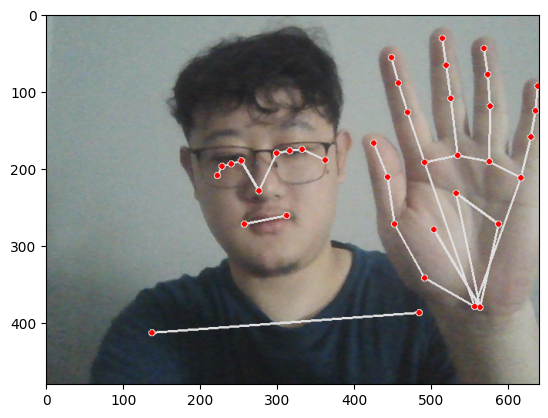

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### 3. Extracting the Keypoint Values

In [67]:
results.pose_landmarks.landmark

[x: 0.69572395
y: 0.4504111
z: -1.6080129
visibility: 0.99954283
, x: 0.74578065
y: 0.35404018
z: -1.5065165
visibility: 0.99887484
, x: 0.776193
y: 0.35838127
z: -1.5070066
visibility: 0.9989908
, x: 0.8068954
y: 0.36197183
z: -1.5068622
visibility: 0.9978721
, x: 0.65480745
y: 0.3396428
z: -1.524584
visibility: 0.99927634
, x: 0.61723816
y: 0.33458012
z: -1.5239422
visibility: 0.9995222
, x: 0.58097184
y: 0.33251223
z: -1.5246708
visibility: 0.99941087
, x: 0.8363024
y: 0.40208593
z: -0.8854046
visibility: 0.99792737
, x: 0.5133464
y: 0.37036705
z: -0.9472853
visibility: 0.99977684
, x: 0.7260821
y: 0.5633432
z: -1.3776658
visibility: 0.9992115
, x: 0.62965715
y: 0.5504213
z: -1.3978419
visibility: 0.99976504
, x: 0.9438432
y: 0.89829475
z: -0.52726907
visibility: 0.93798864
, x: 0.2964483
y: 0.8789255
z: -0.59172356
visibility: 0.99438363
, x: 1.1817429
y: 1.2274702
z: -1.2489012
visibility: 0.042508315
, x: 0.11623387
y: 1.4834006
z: -0.5069072
visibility: 0.3824581
, x: 1.1717231


In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [12]:
extract_keypoints(results)

array([ 4.31490421e-01,  4.77282435e-01, -9.54061031e-01,  9.99978065e-01,
        4.68483299e-01,  3.75626862e-01, -8.91959190e-01,  9.99953926e-01,
        4.94581759e-01,  3.69376063e-01, -8.91741633e-01,  9.99961853e-01,
        5.19951224e-01,  3.65198612e-01, -8.90676796e-01,  9.99950707e-01,
        3.96652162e-01,  3.97485524e-01, -8.64888549e-01,  9.99947131e-01,
        3.76541287e-01,  4.04222488e-01, -8.63417506e-01,  9.99936700e-01,
        3.56381625e-01,  4.11725581e-01, -8.63762379e-01,  9.99916673e-01,
        5.65783024e-01,  3.94752324e-01, -5.12723923e-01,  9.99941289e-01,
        3.48129570e-01,  4.37171072e-01, -3.74302119e-01,  9.99956071e-01,
        4.89015490e-01,  5.44344723e-01, -8.16119790e-01,  9.99926746e-01,
        4.02103245e-01,  5.67461014e-01, -7.78609157e-01,  9.99944389e-01,
        7.56557286e-01,  8.07336628e-01, -3.39643776e-01,  9.97639239e-01,
        2.14288592e-01,  8.61097872e-01, -1.02949008e-01,  9.95281339e-01,
        9.51741576e-01,  

In [13]:
extract_keypoints(results).shape

(258,)

In [14]:
result_test = extract_keypoints(results)

In [15]:
np.array(result_test).shape

(258,)

In [16]:
np.save('0', result_test)

In [17]:
sample =np.load('0.npy')


### 3. Folder for collecting the sample

In [18]:
print(os.path)

<module 'ntpath' (frozen)>


In [19]:
# Path for exported data, numpy arrays
path = './Data' 
# os.mkdir(path)

# wordss that we try to detect
words = np.array(['Namaste', 'Hello', 'Great', 'Bye', 'Thank You'])

# Thirty videos worth of data
videos = 30

# Videos are going to be 30 frames in length
frames_per_video = 30
#60

# Folder start
start_folder = 0

In [20]:
words

array(['Namaste', 'Hello', 'Great', 'Bye', 'Thank You'], dtype='<U9')

In [21]:
for word in words: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, words))).astype(int))
    for sequence in range(0,videos):
        try: 
            os.makedirs(os.path.join(path, word, str(sequence)))
        except:
            pass

### 5 Collecting the key point for the training and testing set

In [22]:
stream = cv2.VideoCapture(0)
# Set mediapipe model 
with marker.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for word in words:
        for sequence in range(start_folder, start_folder+videos):
            for frame_num in range(frames_per_video):
                ret, frame = stream.read()
                image, results = object_detection(frame, holistic)
                landmark_style(image, results)
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, (f"Collecting frames for {word} Video Number {sequence}"), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(100)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(word, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(path, word, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    stream.release()
    cv2.destroyAllWindows()

In [24]:
stream.release()
cv2.destroyAllWindows()

### 6 Data Preprocessing and training

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label: num for num, label in enumerate(words)}

In [24]:
label_map

{'Namaste': 0, 'Hello': 1, 'Great': 2, 'Bye': 3, 'Thank You': 4}

In [25]:
sequences, labels = [], []
for word in words:
    for sequence in range(videos):
        window = []
        for frame_num in range(frames_per_video):
            res = np.load(os.path.join(path, word, str(sequence), f"{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[word])

In [26]:
np.array(sequences).shape

(150, 30, 258)

In [27]:
np.array(labels).shape

(150,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(150, 30, 258)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
X_train.shape

(142, 30, 258)

In [33]:
X_test.shape

(8, 30, 258)

In [34]:
y_train.shape

(142, 5)

In [35]:
y_test.shape

(8, 5)

<h2> LSTM</h2>

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(words.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - categorical_accuracy: 0.2222 - loss: 1.5986
Epoch 2/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.4455 - loss: 1.3570
Epoch 3/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.4377 - loss: 1.1680
Epoch 4/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.4206 - loss: 1.2032
Epoch 5/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.4721 - loss: 1.0853
Epoch 6/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.4646 - loss: 1.0154
Epoch 7/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.5422 - loss: 0.9311
Epoch 8/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.6063 - loss: 1.0923
Epoch 9/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.5887 - loss: 1.0190
Epoch 10/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.4984 - loss: 0.9830
Epoch 11/2000
5/5 ━━━━━━━━━━━

In [43]:
import tensorflow as tf

In [44]:
tf.saved_model.save(model, "my_model3")

INFO:tensorflow:Assets written to: my_model3\assets


INFO:tensorflow:Assets written to: my_model3\assets


In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711,953 (2.72 MB)

 Trainable params: 237,317 (927.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,636 (1.81 MB)

In [46]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


In [47]:
words[np.argmax(res[1])]

'Bye'

In [48]:
words[np.argmax(y_test[1])]

'Bye'

# Evaluations

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [51]:
yhat

array([[9.9999988e-01, 9.9880499e-27, 2.4506517e-09, 2.8690976e-29,
        8.9346194e-08],
       [0.0000000e+00, 4.8324324e-11, 0.0000000e+00, 1.0000000e+00,
        3.7739947e-20],
       [0.0000000e+00, 1.1805585e-33, 0.0000000e+00, 1.0000000e+00,
        1.3362398e-31],
       [3.6063898e-07, 2.9575639e-37, 7.2150748e-16, 6.0765660e-29,
        9.9999964e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [8.0683529e-26, 9.9999928e-01, 3.2504910e-14, 6.8298539e-07,
        4.3942535e-20],
       [9.3475852e-24, 9.9999988e-01, 8.5798417e-12, 1.0905222e-07,
        1.8402319e-19],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 1]],

       [[6, 0],
        [0, 2]],

       [[5, 0],
        [0, 3]],

       [[6, 0],
        [0, 2]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

1.0

# real time Evalution

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, words, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[1], -1)
        cv2.putText(output_frame, words[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

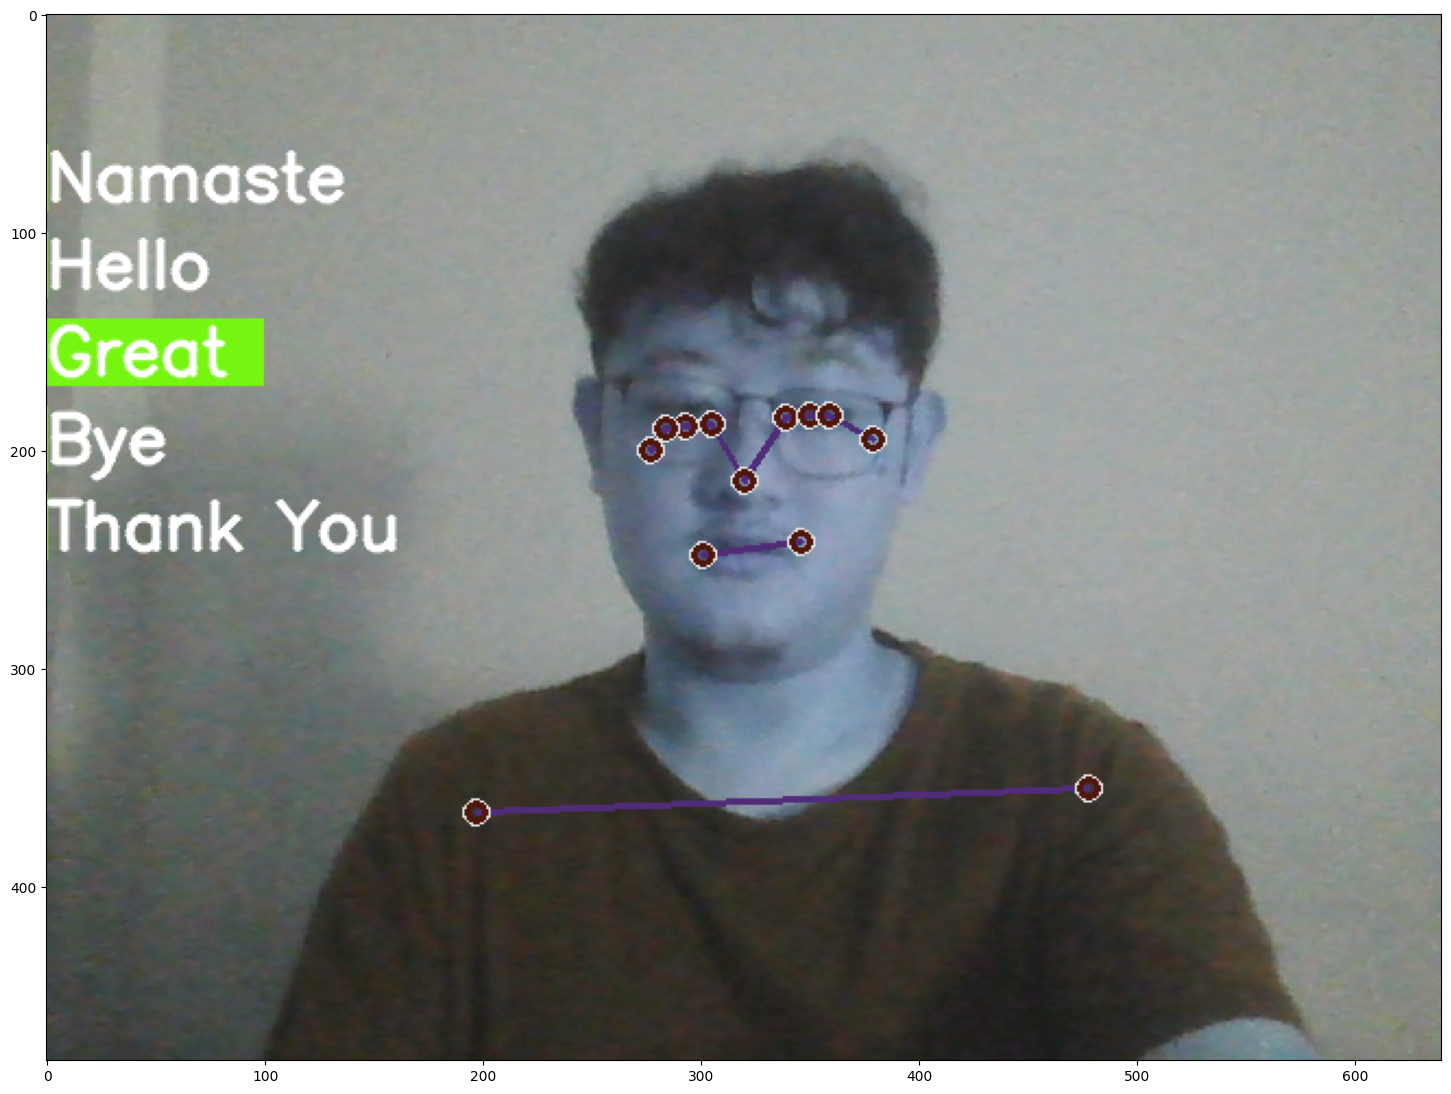

In [60]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, words, image, colors))

In [62]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with marker.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = object_detection(frame, holistic)
        print(results)
        landmark_style(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(words[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                        
                        if len(sentence) > 0: 
                            if words[np.argmax(res)] != sentence[-1]:
                                sentence.append(words[np.argmax(res)])
                        else:
                            sentence.append(words[np.argmax(res)])
    
            if len(sentence) > 5: 
                    sentence = sentence[-5:]

            image = prob_viz(res, words, image, colors)
            
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [58]:
cap.release()
cv2.destroyAllWindows()

In [87]:

loaded_model = tf.saved_model.load("my_model2")
